In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Classifier Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Regressor Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [3]:
df=pd.read_csv(r"C:\Users\Good Day\Desktop\Project 5\processed_data.csv")
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,1,1,1.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,1,1,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,3.0,1,2,28.0,0.38,952.0,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,1,3,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,3021156.0,28.0,1,1,1.0,4.00,2000.0,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181657,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,1,1,41.0,0.96,1240.0,164141591,2020-07-01,602.00
181658,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,1,1,41.0,0.96,1220.0,164141591,2020-07-01,591.00
181659,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,1,1,41.0,0.95,1500.0,164141591,2020-07-01,589.00
181660,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,1,1,41.0,0.71,1250.0,164141591,2020-07-01,619.00


In [4]:
df['selling_price']=df['selling_price'].fillna(df['selling_price'].mean())

In [5]:
df.isnull().sum()

id               2
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [23]:
def plot(df, column):

    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    df[column].plot(kind='hist')
    # sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution PLot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

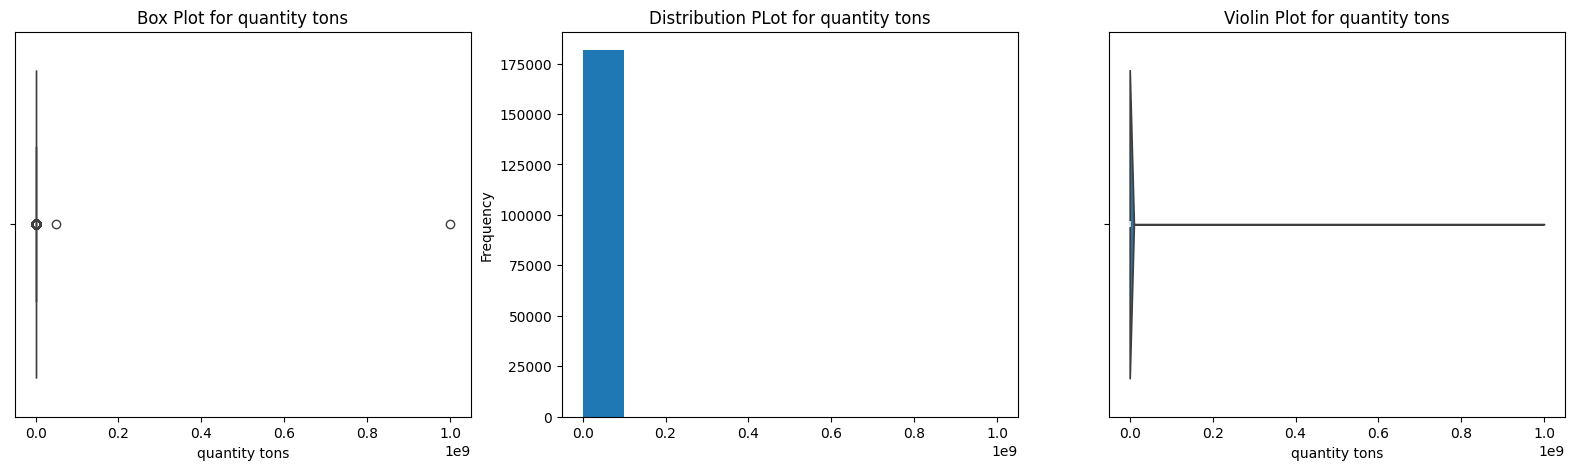

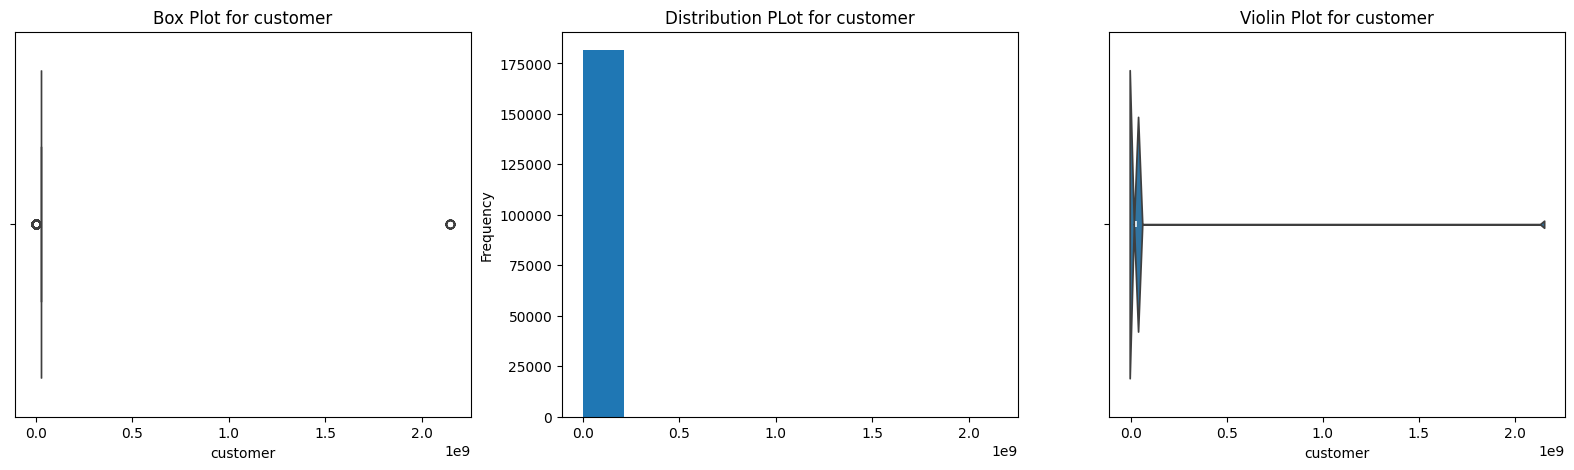

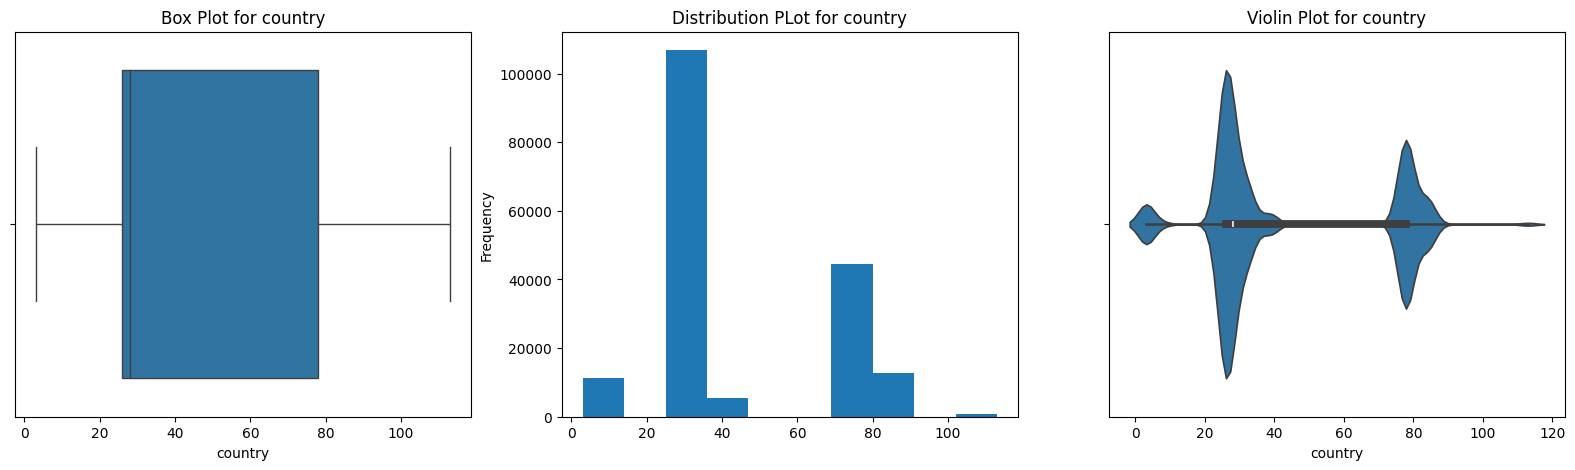

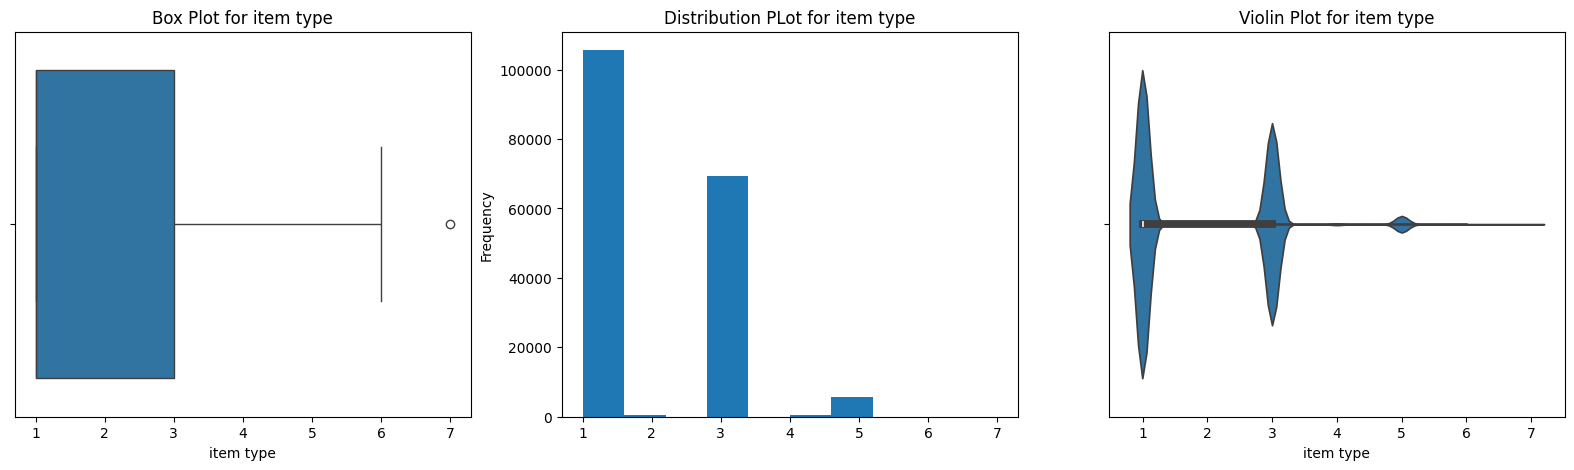

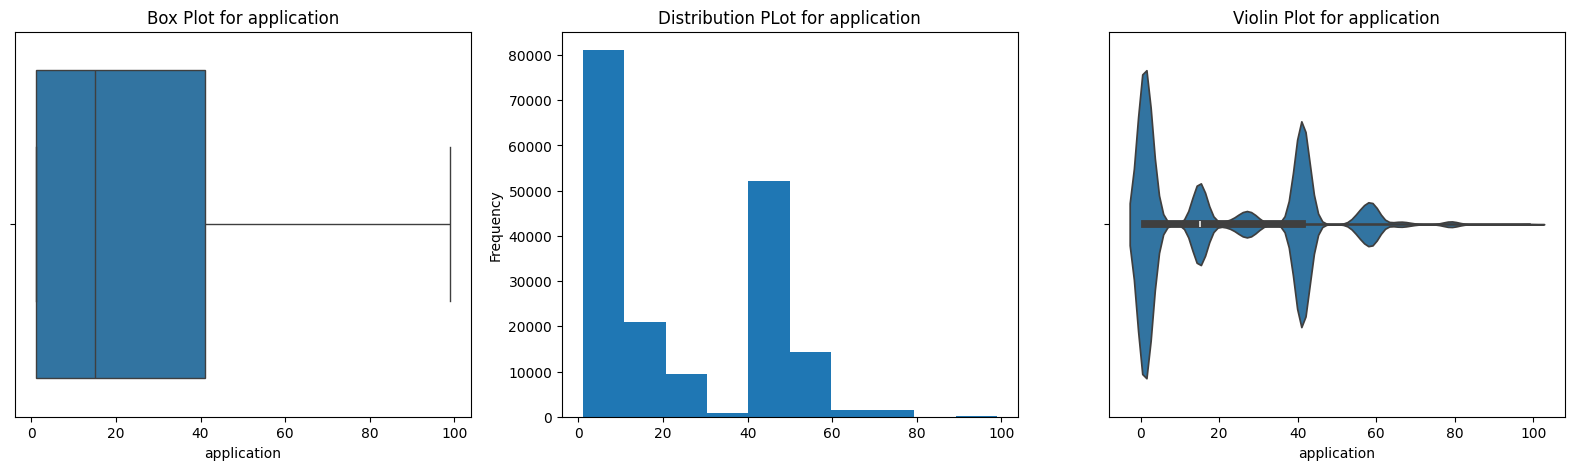

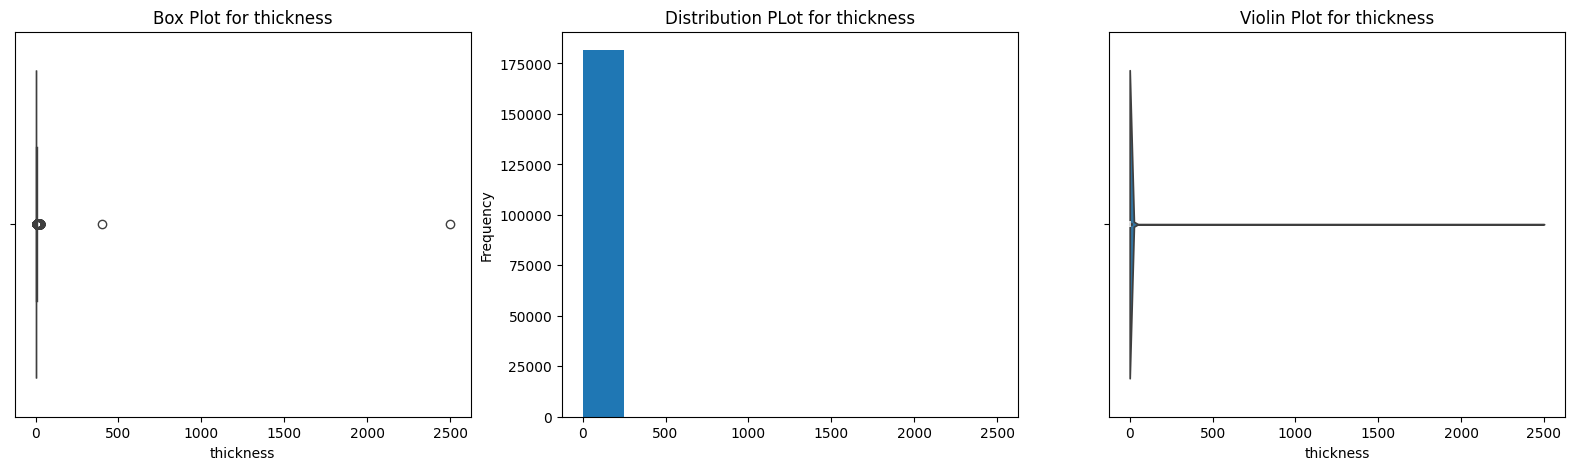

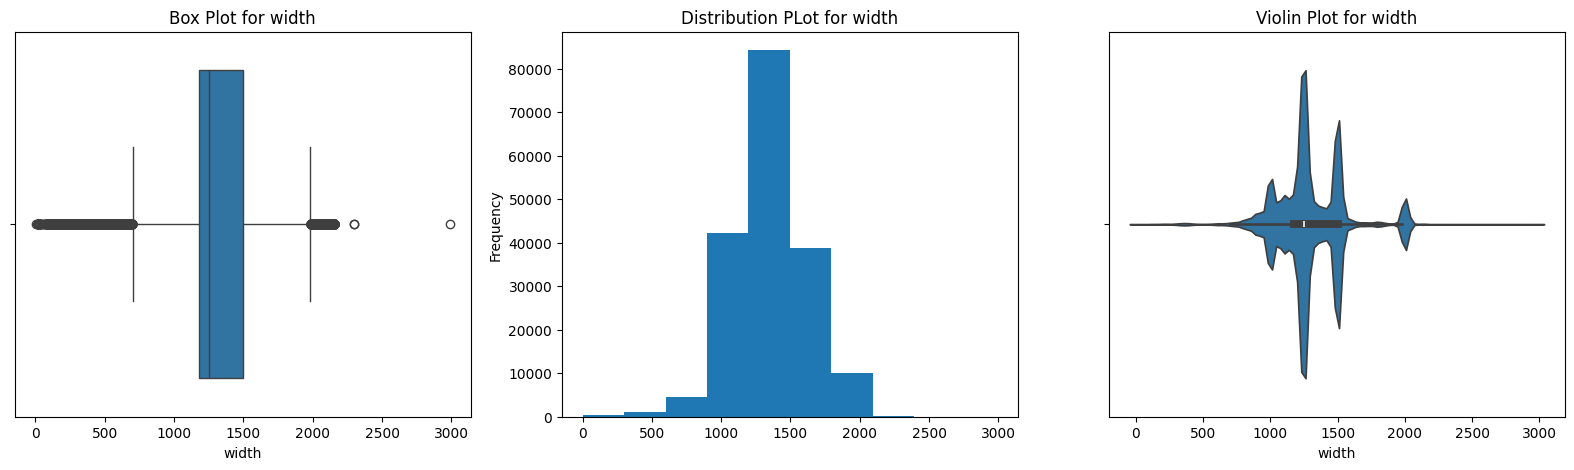

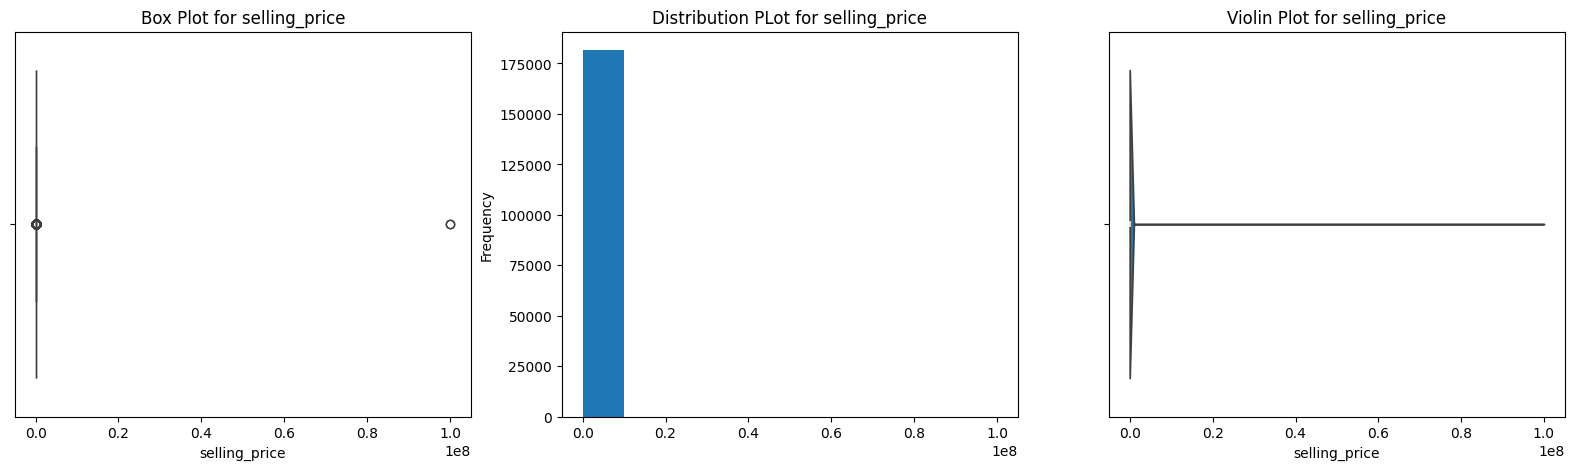

In [59]:
for i in ['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']:
    plot(df, i)

<Axes: ylabel='Frequency'>

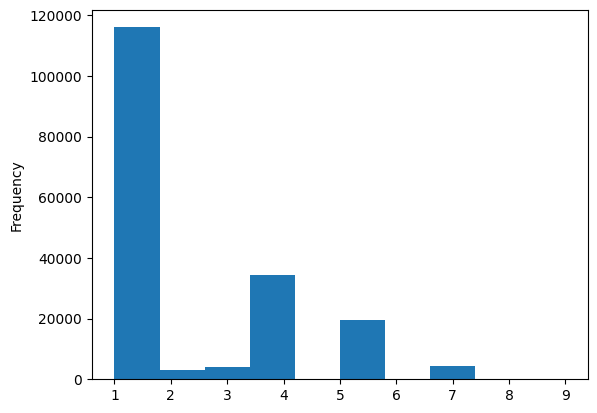

In [62]:
df['status'].plot(kind='hist')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181662 entries, 0 to 181661
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181660 non-null  object 
 1   item_date      181662 non-null  object 
 2   quantity tons  181662 non-null  float64
 3   customer       181662 non-null  float64
 4   country        181662 non-null  float64
 5   status         181662 non-null  int64  
 6   item type      181662 non-null  int64  
 7   application    181662 non-null  float64
 8   thickness      181662 non-null  float64
 9   width          181662 non-null  float64
 10  product_ref    181662 non-null  int64  
 11  delivery date  181662 non-null  object 
 12  selling_price  181662 non-null  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 18.0+ MB


In [7]:
# quantity tons, thickness and selling price is rigth skewed, log transformation.

def transform(df, column):
    df[column]=np.log(df[column])
    return df[column]

transform(df, 'quantity tons')
transform(df, 'thickness')
transform(df, 'selling_price')

c:\Users\Good Day\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Good Day\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0         6.749931
1         6.953684
2         6.468211
3         6.643790
4         6.357842
            ...   
181657    6.400257
181658    6.381816
181659    6.378426
181660    6.428105
181661    6.408529
Name: selling_price, Length: 181662, dtype: float64

In [8]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308.0,28.0,1,1,1.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,30202938.0,25.0,1,1,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,5.956169,30153963.0,3.0,1,2,28.0,-0.967584,952.0,628377,2021-01-01,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,5.310301,30349574.0,32.0,1,3,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,6.666354,3021156.0,28.0,1,1,1.0,1.386294,2000.0,640665,2021-03-01,6.357842


In [76]:
# def plot(df, column):

#     plt.figure(figsize=(20,5))
#     plt.subplot(1,3,1)
#     sns.boxplot(data=df, x=column)
#     plt.title(f'Box Plot for {column}')

#     plt.subplot(1,3,2)
#     sns.histplot(data=df, x=column, kde=True)
#     plt.title(f'Distribution PLot for {column}')

#     plt.subplot(1,3,3)
#     sns.violinplot(data=df, x=column)
#     plt.title(f'Violin Plot for {column}')
#     plt.show()

In [77]:
# for i in ['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']:
#     plot(df, i)

In [9]:
# Treating the outliers using IQR

def outlier(df, column):
    percentile25=df[column].quantile(0.25)
    percentile75=df[column].quantile(0.75)
    iqr=percentile75-percentile25

    upper_limit=percentile75+1.5*iqr
    lower_limit=percentile25-1.5*iqr

    # Replace outliers with upper or lower limit
    df[column] = df[column].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))
    return df[column]
    



outlier(df, 'quantity tons')
outlier(df, 'thickness')
outlier(df, 'width')
outlier(df, 'selling_price')

0         6.749931
1         6.953684
2         6.468211
3         6.643790
4         6.357842
            ...   
181657    6.400257
181658    6.381816
181659    6.378426
181660    6.428105
181661    6.408529
Name: selling_price, Length: 181662, dtype: float64

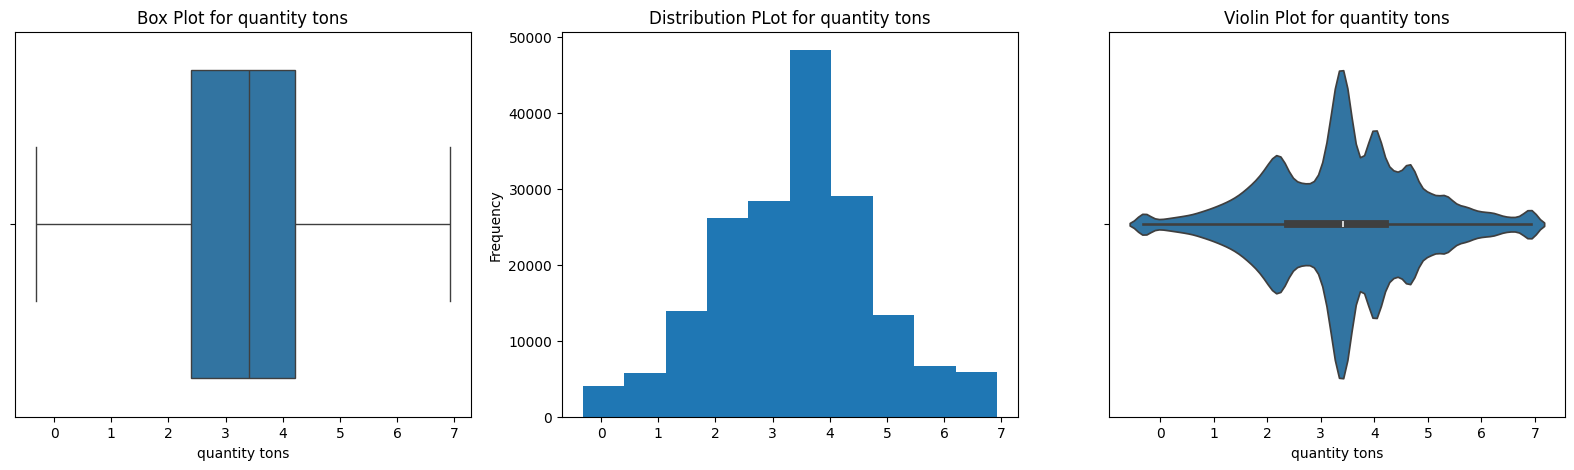

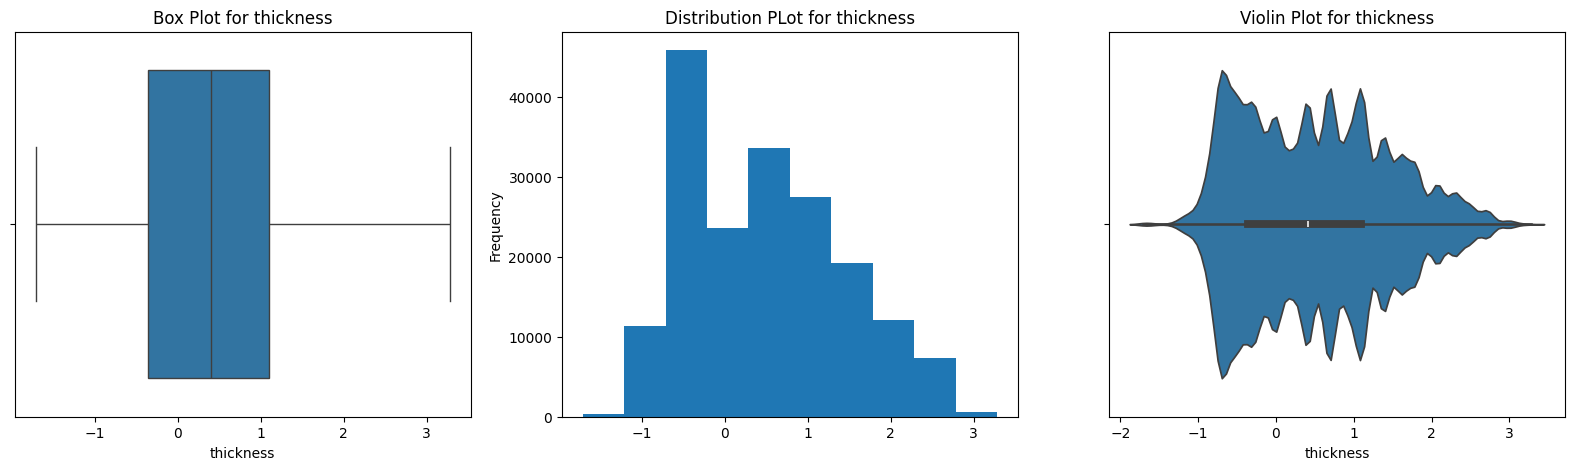

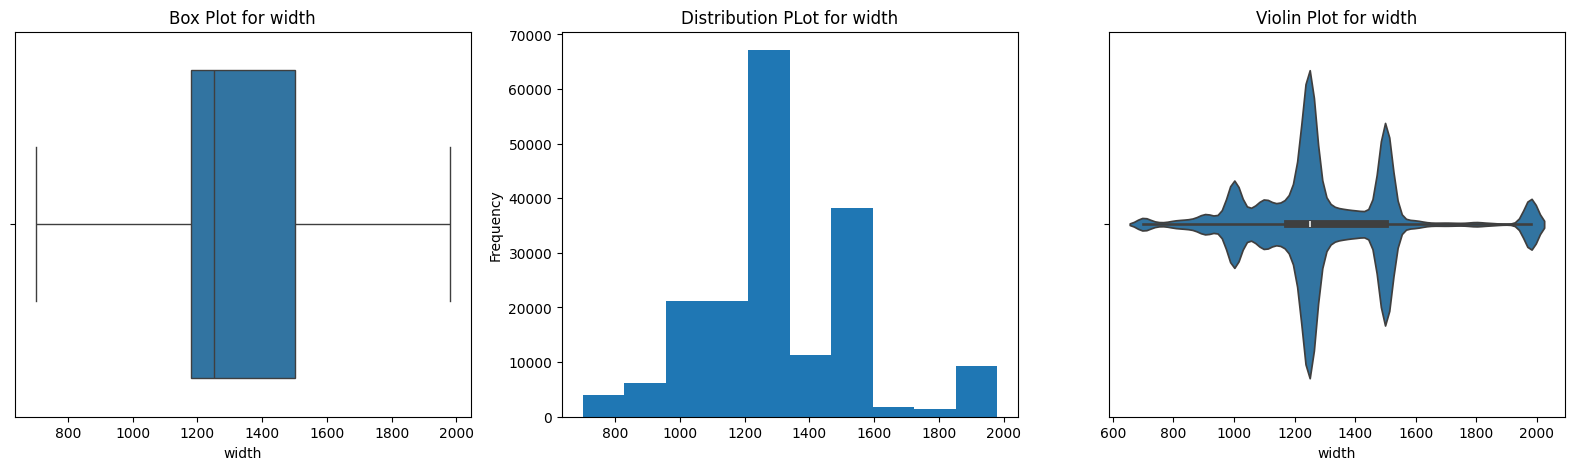

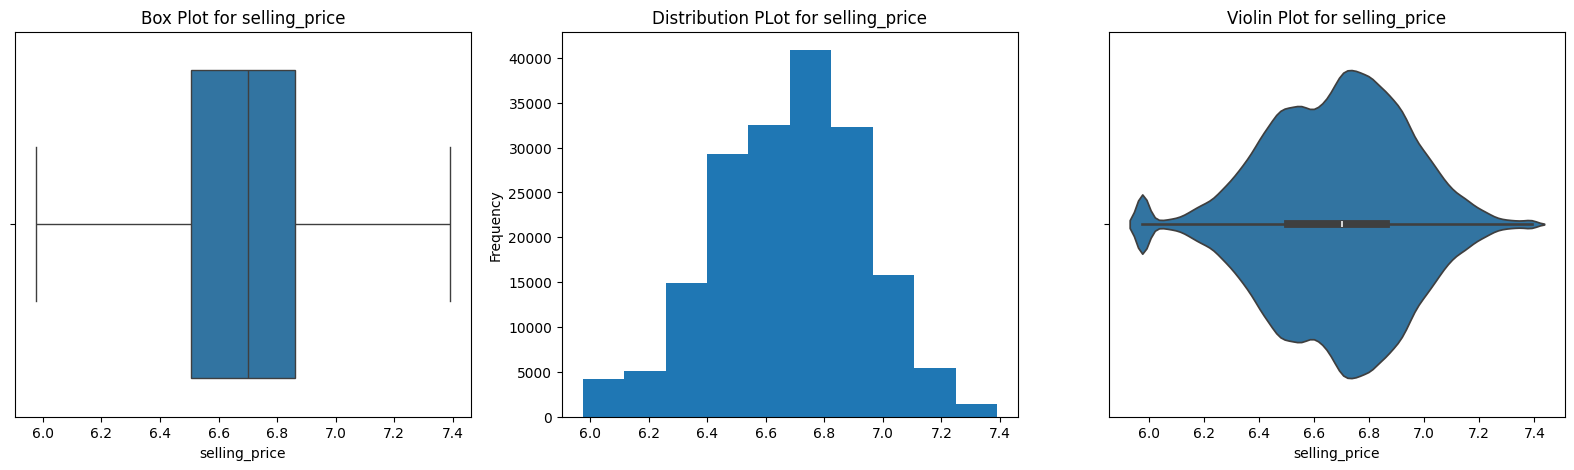

In [24]:
for i in ['quantity tons','thickness', 'width', 'selling_price']:
    plot(df, i)

In [10]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308.0,28.0,1,1,1.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,30202938.0,25.0,1,1,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,5.956169,30153963.0,3.0,1,2,28.0,-0.967584,952.0,628377,2021-01-01,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,5.310301,30349574.0,32.0,1,3,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,6.666354,3021156.0,28.0,1,1,1.0,1.386294,1980.0,640665,2021-03-01,6.357842


<Axes: >

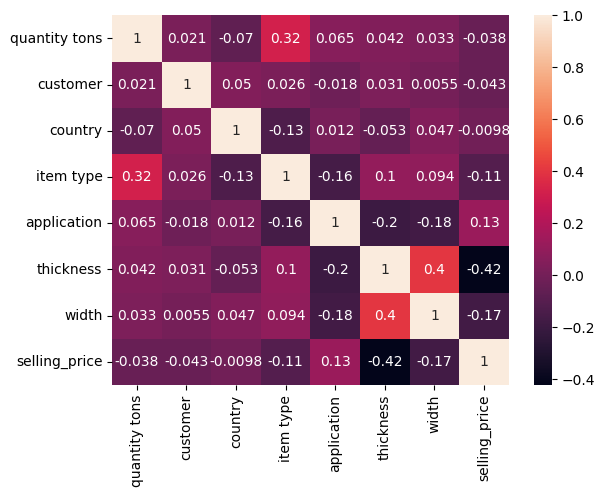

In [80]:
col=['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']
heatmap=df[col].corr()
sns.heatmap(heatmap, annot=True)

In [11]:
df_scaled=df.copy()

In [12]:
df_scaled.isnull().sum()

id               2
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    5
dtype: int64

In [13]:
df_scaled['selling_price']=df['selling_price'].fillna(df['selling_price'].mean())

In [14]:
# Std Scaler


scaler=StandardScaler()

In [15]:
col_names=['quantity tons','customer','country','item type','application','thickness','width','product_ref','selling_price']
features=df_scaled[col_names]

df_scaled[col_names]=scaler.fit_transform(features.values)
df_scaled

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,0.429381,0.091591,-0.572718,1,-0.805814,-0.953744,0.227916,0.815187,1.668008,2021-07-01,0.270767
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,2.330946,0.093406,-0.687666,1,-0.805814,0.921166,-0.753569,-0.349629,1.665086,2021-04-01,1.068593
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,1.837886,0.091500,-1.530615,1,0.089003,0.311820,-1.550976,-1.385913,-0.659704,2021-01-01,-0.832351
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,1.374786,0.099112,-0.419455,1,0.983820,1.764875,0.377622,0.080148,1.665086,2021-01-01,-0.144846
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,2.347102,-0.964323,-0.572718,1,-0.805814,-0.953744,0.970381,2.743157,-0.659687,2021-03-01,-1.264517
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181657,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,0.916253,0.093325,-0.687666,1,-0.805814,0.921166,-0.558275,-0.229131,-0.431816,2020-07-01,-1.098434
181658,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,0.886777,0.093325,-0.687666,1,-0.805814,0.921166,-0.558275,-0.309463,-0.431816,2020-07-01,-1.170644
181659,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,1.394614,0.093325,-0.687666,1,-0.805814,0.921166,-0.569491,0.815187,-0.431816,2020-07-01,-1.183917
181660,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,-1.397766,0.093325,-0.687666,1,-0.805814,0.921166,-0.881407,-0.188965,-0.431816,2020-07-01,-0.989391


In [16]:
df_scaled['status'].value_counts()

status
1    116005
4     34436
5     19573
7      4276
3      4169
2      3139
8        53
9        10
6         1
Name: count, dtype: int64

In [17]:
df_scaled=df_scaled.query('status==1 or status==4') # 1-Won & 4- Lost
df_scaled

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,0.429381,0.091591,-0.572718,1,-0.805814,-0.953744,0.227916,0.815187,1.668008,2021-07-01,0.270767
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,2.330946,0.093406,-0.687666,1,-0.805814,0.921166,-0.753569,-0.349629,1.665086,2021-04-01,1.068593
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,1.837886,0.091500,-1.530615,1,0.089003,0.311820,-1.550976,-1.385913,-0.659704,2021-01-01,-0.832351
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,1.374786,0.099112,-0.419455,1,0.983820,1.764875,0.377622,0.080148,1.665086,2021-01-01,-0.144846
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,2.347102,-0.964323,-0.572718,1,-0.805814,-0.953744,0.970381,2.743157,-0.659687,2021-03-01,-1.264517
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181657,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,0.916253,0.093325,-0.687666,1,-0.805814,0.921166,-0.558275,-0.229131,-0.431816,2020-07-01,-1.098434
181658,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,0.886777,0.093325,-0.687666,1,-0.805814,0.921166,-0.558275,-0.309463,-0.431816,2020-07-01,-1.170644
181659,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,1.394614,0.093325,-0.687666,1,-0.805814,0.921166,-0.569491,0.815187,-0.431816,2020-07-01,-1.183917
181660,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,-1.397766,0.093325,-0.687666,1,-0.805814,0.921166,-0.881407,-0.188965,-0.431816,2020-07-01,-0.989391


In [18]:
# checking the scaled data for balance in status column.
status=df_scaled['status'].value_counts()
status

status
1    116005
4     34436
Name: count, dtype: int64

Axes(0.22375,0.11;0.5775x0.77)


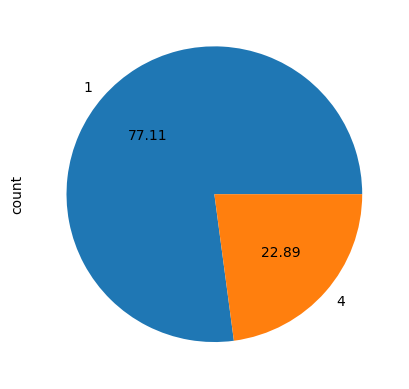

In [122]:
# Since data for Status column of Won & Lost is imbalanced, data to be balanced by SMOTE Oversampling.
# Show pie plot (Approach 1)
plot=status.plot.pie(autopct='%.2f', labels=status.index)
print(plot)

In [19]:
x=df_scaled[['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'product_ref', 'selling_price']]
y=df_scaled['status']

In [20]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120352, 9), (30089, 9), (120352,), (30089,))

In [22]:
df_scaled.isnull().sum()

id               1
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

Text(0.5, 1.0, 'Over-sampling using SMOTE')

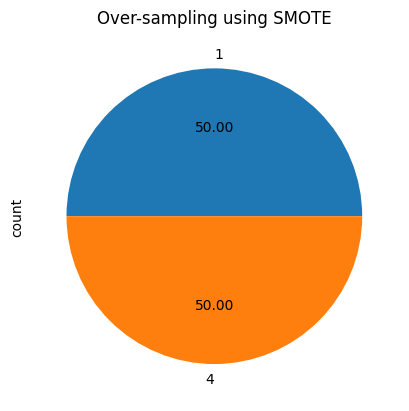

In [23]:
smote=SMOTE()

x_train_smote, y_train_smote= smote.fit_resample(x_train, y_train)

# You can check the class distribution after applying SMOTE

ax=y_train_smote.value_counts().plot.pie(autopct="%.2f")
ax.set_title("Over-sampling using SMOTE")

In [24]:
y_train_smote.value_counts()

status
1    92912
4    92912
Name: count, dtype: int64

In [129]:
# Checking the best classifier model to predict the Status.

def best_classifier_algorithm(x_train_smote,y_train_smote, x_test, y_test, algorithm):

    # Model building
    model=algorithm.fit(x_train_smote, y_train_smote)

    # Predict for train and test accuracy

    y_train_pred = model.predict(x_train_smote)

    y_test_pred  = model.predict(x_test)

    # Accuracy score

    training=accuracy_score(y_train_smote, y_train_pred)
    testing=accuracy_score(y_test, y_test_pred)

    
    classifier={'Algorithm': model.__class__.__name__, 'Training score': training, 'Testing score': testing}

    return classifier

In [128]:


classifier_result = best_classifier_algorithm(x_train_smote, y_train_smote, x_test, y_test, RandomForestClassifier())
print(classifier_result)

classifier_result = best_classifier_algorithm(x_train_smote, y_train_smote, x_test, y_test, ExtraTreesClassifier())
print(classifier_result)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels in y_train_smote
y_train_encoded = label_encoder.fit_transform(y_train_smote)

# Transform labels in y_test
y_test_encoded = label_encoder.transform(y_test)

# Then, proceed with training and testing your classifier
classifier_result = best_classifier_algorithm(x_train_smote, y_train_encoded, x_test, y_test_encoded, XGBClassifier())
print(classifier_result)

classifier_result = best_classifier_algorithm(x_train_smote, y_train_smote, x_test, y_test, LogisticRegression())
print(classifier_result)

{'Algorithm': 'RandomForestClassifier', 'Training score': 0.9999623011385056, 'Testing score': 0.9357240187443916}
{'Algorithm': 'ExtraTreesClassifier', 'Training score': 0.9999623011385056, 'Testing score': 0.9299744092525508}
{'Algorithm': 'XGBClassifier', 'Training score': 0.9222003209788778, 'Testing score': 0.8820499185748945}
{'Algorithm': 'LogisticRegression', 'Training score': 0.6734039917708771, 'Testing score': 0.6608395094552827}


Random Forest Classifier gives more accuracy for prediction.

In [130]:
classifier=best_classifier_algorithm(x_train_smote, y_train_smote, x_test, y_test, RandomForestClassifier())
classifier

{'Algorithm': 'RandomForestClassifier',
 'Training score': 0.9999946185638023,
 'Testing score': 0.9344278640034565}

In [ ]:
# Increasing the accuracy by GridSearchCV technique

params={'max_depth':[10,15,20,25],
        'min_samples_split': [2,4,6],
        'min_samples_leaf':[1,2]
        }

In [ ]:
gcv=GridSearchCV(estimator=RandomForestClassifier(), param_grid=params)

In [ ]:
# gcv.fit(x_train_smote,y_train_smote)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 20, 25],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 6]})

In [ ]:

# model=gcv.best_estimator_
# print(model)

RandomForestClassifier(max_depth=25)


In [ ]:
# model = RandomForestClassifier(max_depth=20).fit(x_train_smote, y_train_smote)
# y_pred_train = model.predict(x_train)
# y_pred_test = model.predict(x_test)
# accuracy_train = accuracy_score(y_train, y_pred_train)
# accuracy_test = accuracy_score(y_test, y_pred_test)
# print(accuracy_train)
# print(accuracy_test)

0.9666312151023664
0.9199042839575925


In [131]:
classifier=RandomForestClassifier(max_depth=25)
model=classifier.fit(x_train_smote, y_train_smote)

In [96]:
# model_1=model.fit(x_train_smote, y_train_smote)

In [132]:
def accuracy_test():

    y_train_pred = model.predict(x_train_smote)

    y_test_pred  = model.predict(x_test)

    # Accuracy score

    training=accuracy_score(y_train_pred, y_train_smote)
    testing=accuracy_score(y_test_pred, y_test)

    return training, testing
accuracy_test()

(0.9964213449285345, 0.9317358503107448)

In [133]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [134]:
y_train_pred = model.predict(x_train_smote)

y_test_pred  = model.predict(x_test)

print(confusion_matrix(y_true=y_test, y_pred=y_test_pred))
# print(classification_report(y_true=y_test, y_pred=y_test_pred))

[[21826  1267]
 [  787  6209]]


In [135]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           1       0.97      0.95      0.96     23093
           4       0.83      0.89      0.86      6996

    accuracy                           0.93     30089
   macro avg       0.90      0.92      0.91     30089
weighted avg       0.93      0.93      0.93     30089



In [145]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

# Compute the ROC curve and AUC score
# fpr, tpr, thresholds = roc_curve(y_true=y_test, y_pred= y_test_pred)
# auc_score = roc_auc_score(y_test, y_test_pred)
# print(f"AUC Score: {auc_score}")


ValueError: y_true takes value in {1, 4} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [136]:
model.predict([[0.429381,	0.091591,	-0.572718,	-0.805814,	-0.953744,	0.227916,	0.815187,	1.668008,	0.270767]])

c:\Users\Good Day\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [137]:
import pickle

In [139]:
with open('classify.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('classify.pkl', 'rb') as file:
    status=pickle.load(file)

Selling Price Prediction.

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [26]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308.0,28.0,1,1,1.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,30202938.0,25.0,1,1,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,5.956169,30153963.0,3.0,1,2,28.0,-0.967584,952.0,628377,2021-01-01,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,5.310301,30349574.0,32.0,1,3,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,6.666354,3021156.0,28.0,1,1,1.0,1.386294,1980.0,640665,2021-03-01,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181657,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,4.670802,30200854.0,25.0,1,1,41.0,-0.040822,1240.0,164141591,2020-07-01,6.400257
181658,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,4.629691,30200854.0,25.0,1,1,41.0,-0.040822,1220.0,164141591,2020-07-01,6.381816
181659,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,5.337954,30200854.0,25.0,1,1,41.0,-0.051293,1500.0,164141591,2020-07-01,6.378426
181660,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,1.443523,30200854.0,25.0,1,1,41.0,-0.342490,1250.0,164141591,2020-07-01,6.428105


In [27]:
df['selling_price']=df['selling_price'].fillna(df['selling_price'].mean())

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181662 entries, 0 to 181661
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181660 non-null  object 
 1   item_date      181662 non-null  object 
 2   quantity tons  181662 non-null  float64
 3   customer       181662 non-null  float64
 4   country        181662 non-null  float64
 5   status         181662 non-null  int64  
 6   item type      181662 non-null  int64  
 7   application    181662 non-null  float64
 8   thickness      181662 non-null  float64
 9   width          181662 non-null  float64
 10  product_ref    181662 non-null  int64  
 11  delivery date  181662 non-null  object 
 12  selling_price  181662 non-null  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 18.0+ MB


In [144]:
# col_names=['quantity tons','customer','country','item type','application','thickness','width','product_ref','status']
# features=df[col_names]

# df[col_names]=scaler.fit_transform(features.values)
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,0.429381,0.091591,-0.572718,-0.70267,-0.805814,-0.953744,0.227916,0.815187,1.668008,2021-07-01,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,2.330946,0.093406,-0.687666,-0.70267,-0.805814,0.921166,-0.753569,-0.349629,1.665086,2021-04-01,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,1.837886,0.091500,-1.530615,-0.70267,0.089003,0.311820,-1.550976,-1.385913,-0.659704,2021-01-01,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,1.374786,0.099112,-0.419455,-0.70267,0.983820,1.764875,0.377622,0.080148,1.665086,2021-01-01,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,2.347102,-0.964323,-0.572718,-0.70267,-0.805814,-0.953744,0.970381,2.743157,-0.659687,2021-03-01,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181657,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,0.916253,0.093325,-0.687666,-0.70267,-0.805814,0.921166,-0.558275,-0.229131,-0.431816,2020-07-01,6.400257
181658,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,0.886777,0.093325,-0.687666,-0.70267,-0.805814,0.921166,-0.558275,-0.309463,-0.431816,2020-07-01,6.381816
181659,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,1.394614,0.093325,-0.687666,-0.70267,-0.805814,0.921166,-0.569491,0.815187,-0.431816,2020-07-01,6.378426
181660,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,-1.397766,0.093325,-0.687666,-0.70267,-0.805814,0.921166,-0.881407,-0.188965,-0.431816,2020-07-01,6.428105


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181662 entries, 0 to 181661
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181660 non-null  object 
 1   item_date      181662 non-null  object 
 2   quantity tons  181662 non-null  float64
 3   customer       181662 non-null  float64
 4   country        181662 non-null  float64
 5   status         181662 non-null  float64
 6   item type      181662 non-null  float64
 7   application    181662 non-null  float64
 8   thickness      181662 non-null  float64
 9   width          181662 non-null  float64
 10  product_ref    181662 non-null  float64
 11  delivery date  181662 non-null  object 
 12  selling_price  181662 non-null  float64
dtypes: float64(10), object(3)
memory usage: 18.0+ MB


In [29]:
def machine_learning_regression(df, algorithm):

    # Feature & Target setting
    x = df[['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'product_ref', 'status']]
    y = df['selling_price']
    # Train & testing split
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    # Model building
    model = algorithm().fit(x_train, y_train)
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

   
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics


In [242]:
 # Feature & Target setting
# x = df[['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'product_ref', 'status']]
# y = df['selling_price']

In [245]:
# x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [30]:
x_train.shape, y_train.shape

((120352, 9), (120352,))

In [36]:
from sklearn import metrics

# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

In [37]:
from sklearn.metrics import r2_score


In [31]:
print(machine_learning_regression(df,LinearRegression))
# print(machine_learning_regression(df,RandomForestRegressor))
print(machine_learning_regression(df,DecisionTreeRegressor))
print(machine_learning_regression(df,XGBRegressor))
print(machine_learning_regression(df, AdaBoostRegressor))
print(machine_learning_regression(df, GradientBoostingRegressor))
print(machine_learning_regression(df, DecisionTreeRegressor))

{'algorithm': 'LinearRegression', 'R2_train': 0.19056250289040344, 'R2_test': 0.19154412856983316}
{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9977365238018489, 'R2_test': 0.5018119824505163}
{'algorithm': 'XGBRegressor', 'R2_train': 0.6762729111277002, 'R2_test': 0.6519013625640615}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.4081784700244908, 'R2_test': 0.4092175713909487}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.5202186870960352, 'R2_test': 0.5186967194440588}
{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9977365238018489, 'R2_test': 0.5015459660087448}


In [32]:
# since Random Forest gives more accuracy
price=RandomForestRegressor().fit(x_train, y_train)

In [33]:
y_pred=price.predict(x_test)

In [34]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.29755126458174086
Mean Squared Error: 0.4164605603376649
R2 Score: 0.7406915185130194


In [38]:
import pickle
with open('prediction.pkl', 'wb') as file:
    pickle.dump(price,file)

with open('prediction.pkl', 'rb') as file:
    pred=pickle.load(file)

In [62]:
rate=pred.predict([[3.399, 	30202938.0,	25.0,	4,	41.0,	-0.223144,	1210.0,	1668701718, 4]])

c:\Users\Good Day\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [63]:
rate

array([1.51])

In [64]:
value=np.exp(rate)
# value=np.exp(value)
value

array([4.52673079])

In [80]:
x=np.exp(6.74)
x


845.5607358510367